In [2]:
#import the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
#loading the dataset to a pandas dataframe
credit_card_data = pd.read_csv(r'C:\Users\Acer\Desktop\TCS project\Credit Card Fraud Detection\data\creditcard.csv')

In [4]:
#first 5 rows of the dataset
credit_card_data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
#last 5 rows of dataset
credit_card_data.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

In [7]:
#dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# check missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#distribution of legit transaction and fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This Dataset is highly unbalanced

0 -> Normal Transactionn

1 -> Fraudulent Transaction

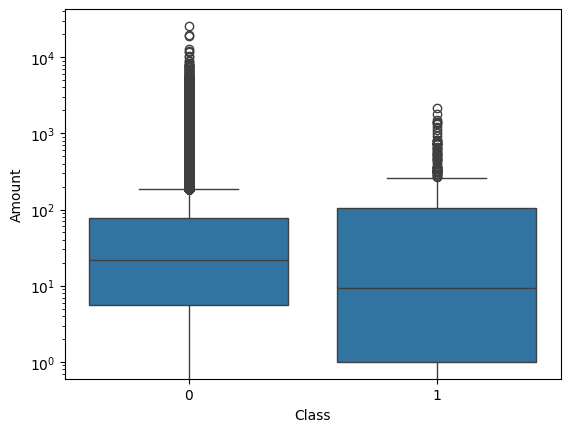

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=credit_card_data["Class"], y=credit_card_data["Amount"])
plt.yscale("log")  # Log scale for better visualization
plt.show()


In [11]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [56]:
df_features = credit_card_data.drop(columns=["Time", "Amount"])
print(df_features.shape)  # Should be (284807, 29)
print(df_features.columns)  # List of remaining features


(284807, 29)
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')


In [57]:
df_features = credit_card_data.drop(columns=["Time", "Amount", "Class"])
print(df_features.shape)  # Should be (284807, 28)


(284807, 28)


In [60]:
print(credit_card_data.shape)  # Check total rows and columns
print(credit_card_data.columns)
print(model.feature_names_in_)


(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount']


In [61]:
df_features = credit_card_data.drop(columns=["Class"])


In [12]:
# identify rows,columns
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [13]:
# statistical meaures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30 columns]

Under-Sampling

Build a sample dataset containing similar distributions and Fraudulent Transactions

NUmber of Fraudulent Transactions -> 492

In [16]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [17]:
new_datasets = pd.concat([legit_sample, fraud], axis=0)

In [18]:
new_datasets.head()

Time        V1        V2        V3        V4        V5        V6  \
274592  166103.0 -6.110741  4.748954 -5.660883 -1.163560 -2.379251 -1.511521   
37714    39075.0  1.157200  0.188880  0.435977  0.969294 -0.133567 -0.287929   
144200   85935.0 -0.198540  1.011707  1.334478  1.069106  0.590583  0.509465   
99162    66995.0  1.236558  0.336543  0.201192  0.494880 -0.101989 -0.546553   
137421   82153.0 -1.691638  0.243310  1.321702 -0.369832 -0.115152 -0.320416   

              V7        V8        V9  ...       V21       V22       V23  \
274592 -2.593905  2.417350 -0.516600  ...  1.970719  0.097483  0.521481   
37714   0.075381 -0.155416  0.014905  ... -0.189704 -0.602977 -0.042409   
144200  0.414745  0.098872 -1.081011  ... -0.018705 -0.023374 -0.397304   
99162   0.016533 -0.068815 -0.292847  ... -0.250682 -0.730348  0.069166   
137421 -0.121484  0.585356 -0.169411  ...  0.261366  0.641051 -0.266382   

             V24       V25       V26       V27       V28  Amount  Class  
274592 -0.486865  0.275931  0.149340 -0.188057 -0.140676    4.99      0  
37714  -0.335687  0.424376 -0.589201  0.035122  0.040059   59.99      0  
144200 -0.809265  0.460261 -0.099005  0.045483 -0.010111    6.24      0  
99162  -0.020984  0.249426  0.095342 -0.023553  0.018599    1.98      0  
137421  0.098079  0.023450  0.430399  0.075327  0.076597   55.65      0  

[5 rows x 31 columns]

In [19]:
new_datasets.tail()

Time        V1        V2        V3        V4        V5        V6  \
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  ...       V21       V22       V23  \
279863 -0.882850  0.697211 -2.064945  ...  0.778584 -0.319189  0.639419   
280143 -1.413170  0.248525 -1.127396  ...  0.370612  0.028234 -0.145640   
280149 -2.234739  1.210158 -0.652250  ...  0.751826  0.834108  0.190944   
281144 -2.208002  1.058733 -1.632333  ...  0.583276 -0.269209 -0.456108   
281674  0.223050 -0.068384  0.577829  ... -0.164350 -0.295135 -0.072173   

             V24       V25       V26       V27       V28  Amount  Class  
279863 -0.294885  0.537503  0.788395  0.292680  0.147968  390.00      1  
280143 -0.081049  0.521875  0.739467  0.389152  0.186637    0.76      1  
280149  0.032070 -0.739695  0.471111  0.385107  0.194361   77.89      1  
281144 -0.183659 -0.328168  0.606116  0.884876 -0.253700  245.00      1  
281674 -0.450261  0.313267 -0.289617  0.002988 -0.015309   42.53      1  

[5 rows x 31 columns]

In [20]:
new_datasets['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [21]:
new_datasets.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94734.382114  0.062256 -0.014812 -0.016961 -0.040839 -0.031299   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0     -0.065956 -0.001730 -0.054271 -0.084790  ...  0.004494  0.019302   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.032432 -0.001043 -0.049672 -0.000526 -0.015092  0.001438 -0.007760   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       86.434126  
1      122.211321  

[2 rows x 30 columns]

Spliting the data into Features & Targets

In [22]:
X = new_datasets.drop(columns='Class', axis=1)
Y = new_datasets['Class']

In [23]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
274592  166103.0 -6.110741  4.748954 -5.660883 -1.163560 -2.379251 -1.511521   
37714    39075.0  1.157200  0.188880  0.435977  0.969294 -0.133567 -0.287929   
144200   85935.0 -0.198540  1.011707  1.334478  1.069106  0.590583  0.509465   
99162    66995.0  1.236558  0.336543  0.201192  0.494880 -0.101989 -0.546553   
137421   82153.0 -1.691638  0.243310  1.321702 -0.369832 -0.115152 -0.320416   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [24]:
print(Y)

274592    0
37714     0
144200    0
99162     0
137421    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

In [27]:
# Logistic Regression
Model = LogisticRegression()

In [28]:
# training the logistic Regression Model with Training Data
Model.fit(X_train, Y_train)

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [29]:
# accuracy on traing data
X_train_prediction = Model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
print('Accuracy score on Training Data: ',training_data_accuracy)

Accuracy score on Training Data:  0.9313850063532402


In [31]:
# accuracy on test data
X_test_prediction = Model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [32]:
print('Accuracy score on Test data: ', test_data_accuracy)

Accuracy score on Test data:  0.9187817258883249


In [33]:
# Logistic Regression
#Simple and interpretable, works well for linear relationships.

Model = LogisticRegression()
# training the logistic Regression Model with Training Data
Model.fit(X_train, Y_train)
# accuracy on traing data
X_train_prediction = Model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on Training Data: ',training_data_accuracy)
# accuracy on test data
X_test_prediction = Model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test data: ', test_data_accuracy)
y_pred = Model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy score on Training Data:  0.9313850063532402
Accuracy score on Test data:  0.9187817258883249
Logistic Regression Accuracy: 0.9187817258883249


C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
#Decision Tree Classifier
#Simple tree-based model, easy to interpret but prone to overfitting.

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(Y_test, y_pred))


Decision Tree Accuracy: 0.9035532994923858


In [35]:
# Random Forest Classifier
#Uses multiple decision trees to improve accuracy and reduce overfitting.
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(Y_test, y_pred))


Random Forest Accuracy: 0.9137055837563451


In [39]:
# XGBoost Classifier (Better for Imbalanced Data)
#Gradient boosting method, works well for structured data.
from xgboost import XGBClassifier

model = XGBClassifier(scale_pos_weight=10, random_state=42)  # Handles class imbalance
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(Y_test, y_pred))


XGBoost Accuracy: 0.9086294416243654


In [40]:
#Support Vector Machine (SVM)
#Good for high-dimensional data, but slower on large datasets.
from sklearn.svm import SVC

model = SVC(kernel='rbf', class_weight='balanced')
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
print("SVM Accuracy:", accuracy_score(Y_test, y_pred))



SVM Accuracy: 0.5482233502538071


Logistic Regression → Simple & fast

Decision Tree → Easy to understand, may overfit

Random Forest → More stable, reduces overfitting

XGBoost → Best for imbalanced data

SVM → Works well with complex data

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Train-test split (if not done)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=10, random_state=42),
    "SVM": SVC(kernel='rbf', class_weight='balanced', probability=True)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    # Compute metrics
    report = classification_report(Y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(Y_test, y_pred_prob) if y_pred_prob is not None else "N/A"

    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"],
        "ROC-AUC": roc_auc
    }

# Display results
import pandas as pd
df_results = pd.DataFrame(results).T
print(df_results)


C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.939086   0.967391  0.908163  0.936842  0.974747
Decision Tree        0.883249   0.894737  0.867347  0.880829  0.883168
Random Forest        0.913706   0.945055  0.877551  0.910053  0.975830
XGBoost              0.928934   0.956522  0.897959  0.926316  0.975572
SVM                  0.624365   0.617647  0.642857  0.630000  0.680066


In [54]:
import joblib

# Load the model
model = joblib.load(r"C:\Users\Acer\Desktop\TCS project\Credit Card Fraud Detection\models\fraud_model.pkl")

# Print expected number of features
print(f"Model expects {model.n_features_in_} features.")


Model expects 30 features.
